In [1]:
## Advanced Course in Machine Learning
## Week 2
## Exercise 3 / Stochastic gradient descent

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import inf

In [2]:
# Read in the whitewine data
dataFile = "winequality-white.csv"
data = pd.read_csv(dataFile, sep=";")
#data.drop(index=range(20,len(data.iloc[:,0])), inplace=True)
y = data['alcohol']
X = data.drop(columns=['alcohol'])
# N = 4898, D = 11

In [3]:
# Add constant feature
constantCol = np.ones((len(X.iloc[:,0])), dtype='float64')
X['constant'] = constantCol

In [4]:
# Standardize the data with Min-Max Normalization
X = X.astype('float64')
mins = X.min(axis=0)
maxs = X.max(axis=0)
X = (X - mins) / (maxs - mins)
X.iloc[:,11].fillna(0, inplace=True)
X.columns = range(len(X.iloc[0,:]))

In [5]:
# Split into training and test sets, randomizing the order of the samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize theta
theta = np.random.uniform(size=(X_train.shape[1],))
theta = np.asmatrix(theta)
print(theta)

[[0.83301446 0.37048016 0.30231286 0.90879608 0.76239402 0.11161238
  0.56969791 0.380116   0.30297304 0.11336301 0.05763783 0.53297749]]


In [7]:
def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [8]:
def error (theta, X, y):
    y = np.asmatrix(y)
    y_hat = np.dot(theta, X.transpose())
    error = y_hat - y
    return error

def loss (error):
    loss = np.mean(np.square(error))
    return loss

def gradient (error, X):
    N = len(X.iloc[:,0])
    sumInter = np.dot(error, X)
    return 2*sumInter/N

In [9]:
algo = 'a' # 'a' = adagrad, 'f' = fixed schedule
batchSize = 100
epochs = 100
initStepSize = 0.5
tau = 0.0005
adagrad_initStepSize = np.full((1,12), 1.5, dtype='float64')
adagrad_tau = np.float64(0.99)
lossHistory = []
lossHistory_validation = []
lossHistory_validation_x = []

In [10]:
if algo == 'f':
    # Fixed schedule
    stepSize = initStepSize
elif algo == 'a':
    # Adagrad
    stepSize = adagrad_initStepSize
t = 0  
run = 0
adagrad_s = np.zeros((1,12))
#adagrad_s = np.zeros((1,12), dtype='float64')


# Main loop
for epoch in np.arange(0, epochs):
    # initialize the total loss for the epoch
    epochLoss = []    
    
    for (batchX, batchY) in next_batch(X, y, batchSize):
        t = t + 1
        run += batchSize
        
        errB = error(theta, batchX, batchY)
        lossB = loss(errB)
        epochLoss.append(lossB)
        gradientB = gradient(errB, batchX)
        
        if algo == 'f':
            # Fixed schedule
            theta += -stepSize * gradientB 
            stepSize = initStepSize / (1 + initStepSize * tau * t)
        elif algo == 'a':
            # Adagrad
            theta -= np.multiply(stepSize, gradientB)
            adagrad_s += np.square(gradientB)
            stepSize = adagrad_initStepSize / (adagrad_tau * np.sqrt(adagrad_s))
            stepSize[stepSize == inf] = 0
            
        # Evaluate validation loss every 200 samples
        if (run%200 == 0):
            errValidation = error(theta, X_test, y_test)
            lossValidation = loss(errValidation)
            lossHistory_validation.append(lossValidation)
            lossHistory_validation_x.append(run)
            
    lossHistory.append(np.average(epochLoss))
    

/home/mkotola/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide


In [11]:
print(gradientB)
print(gradientB.shape)

[[-0.05735946 -0.07862318 -0.06510419 -0.02222526 -0.01688383 -0.02321028
  -0.09415196 -0.01767569 -0.14385681 -0.11493929 -0.17369074  0.        ]]
(1, 12)


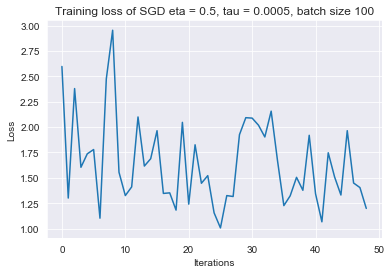

In [12]:
sns.set_style("darkgrid")
plt.plot(range(len(epochLoss)), epochLoss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training loss of SGD eta = ' + str(initStepSize) + ', tau = ' + str(tau) + ', batch size ' + str(batchSize))
plt.show()

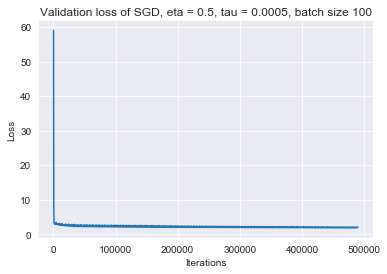

In [13]:
plt.plot(lossHistory_validation_x, lossHistory_validation)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Validation loss of SGD, eta = ' + str(initStepSize) + ', tau = ' + str(tau) + ', batch size ' + str(batchSize))
plt.show()

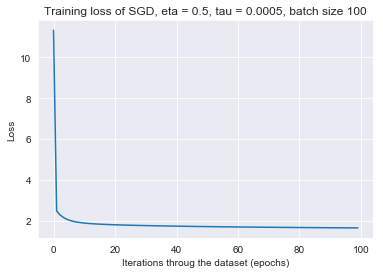

In [14]:
plt.plot(range(len(lossHistory)), lossHistory)
plt.xlabel('Iterations throug the dataset (epochs)')
plt.ylabel('Loss')
plt.title('Training loss of SGD, eta = ' + str(initStepSize) + ', tau = ' + str(tau) + ', batch size ' + str(batchSize))
plt.show()

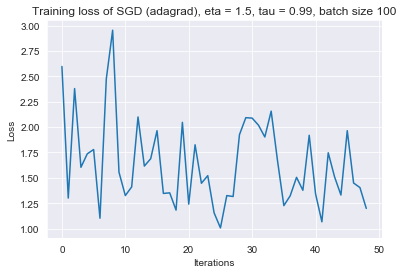

In [15]:
plt.plot(range(len(epochLoss)), epochLoss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training loss of SGD (adagrad), eta = ' + str(adagrad_initStepSize[0,0]) + ', tau = ' + str(adagrad_tau) + ', batch size ' + str(batchSize))
plt.show()

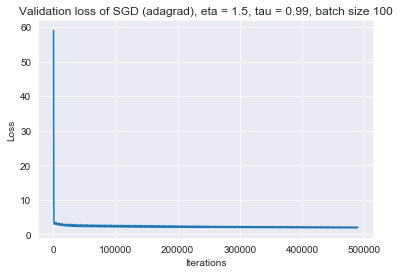

In [16]:
plt.plot(lossHistory_validation_x, lossHistory_validation)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Validation loss of SGD (adagrad), eta = ' + str(adagrad_initStepSize[0,0]) + ', tau = ' + str(adagrad_tau) + ', batch size ' + str(batchSize))
plt.show()

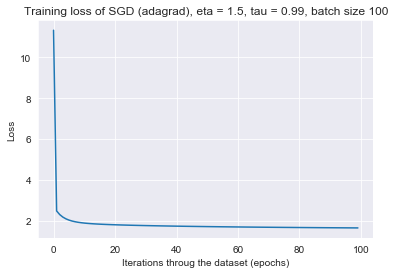

In [17]:
plt.plot(range(len(lossHistory)), lossHistory)
plt.xlabel('Iterations throug the dataset (epochs)')
plt.ylabel('Loss')
plt.title('Training loss of SGD (adagrad), eta = ' + str(adagrad_initStepSize[0,0]) + ', tau = ' + str(adagrad_tau) + ', batch size ' + str(batchSize))
plt.show()